In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Как много пассажиров ехало первым классом?

In [3]:
df.rename(columns={"PassengerId":"Count"}).groupby("Pclass").agg({"Count":"count","Survived":np.sum})

,Count,Survived
Pclass,,
1,216,136
2,184,87
3,491,119


Какой возраст имели пассажиры?

In [4]:
df.Age.mean()

29.69911764705882

In [5]:
df.groupby(['Sex','Pclass']).Age.agg([np.mean, np.std])

mean        std
Sex    Pclass                      
female 1       34.611765  13.612052
       2       28.722973  12.872702
       3       21.750000  12.729964
male   1       41.281386  15.139570
       2       30.740707  14.793894
       3       26.507589  12.159514

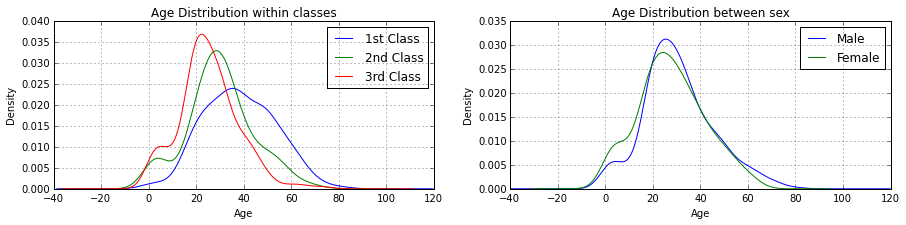

In [6]:
plt.figure(figsize=(15,3)) 
plt.subplot2grid((1,2),(0,0))
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 
plt.subplot2grid((1,2),(0,1))
df.Age[df.Sex == "male"].plot(kind='kde')    
df.Age[df.Sex == "female"].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution between sex")
plt.legend(('Male','Female'),loc='best')

Какое распределение детей по классам?

In [7]:
# Предварительно добавим в датасет дополнительные свойства
import data; reload(data)
import findfamilies; reload(findfamilies)
import synthesize_attributes; reload(synthesize_attributes)
train_dataset = data.TitanicDataSet.load("../data/train.csv", False)
people = [synthesize_attributes.mark_problems(p,f) for f in findfamilies.construct_family_components(train=train_dataset, test=None) for p in f.nodes]
syntesized_props = synthesize_attributes.synthesize(people)
df2 = pd.DataFrame(syntesized_props)
df = df.merge(df2, how="left", left_on="PassengerId", right_on="id")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,firstname,had_spouse,id,lastname,n_children,n_parents,n_sibling,nickname,othername,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,...,owen,False,1,braund,0,0,1,None,None,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,...,john,False,2,cumings,0,0,0,None,florence briggs thayer,mrs


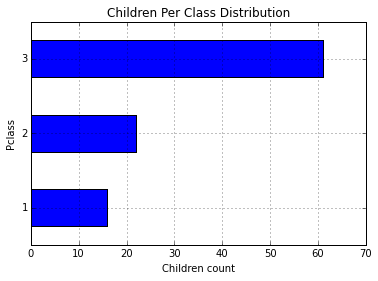

In [8]:
df.groupby('Pclass').n_children.sum().plot(kind="barh")
plt.title("Children Per Class Distribution")
plt.xlabel("Children count")

Коррелируют ли число братьев/сестер с числом родителей/детей?

In [9]:
SibSp_Parch_corr = df.SibSp.corr(df.Parch, method='spearman')
print 'Да' if SibSp_Parch_corr > .305 else 'Нет', ':', SibSp_Parch_corr

Да : 0.450013971009


Какие самые популярные имена на корабле?

In [10]:
df.firstname.value_counts().head(10)

william      48
john         31
thomas       19
charles      16
george       16
henry        15
james        15
edward       13
frederick    13
richard      11
dtype: int64

Как варьируется цена билета на Титаник?

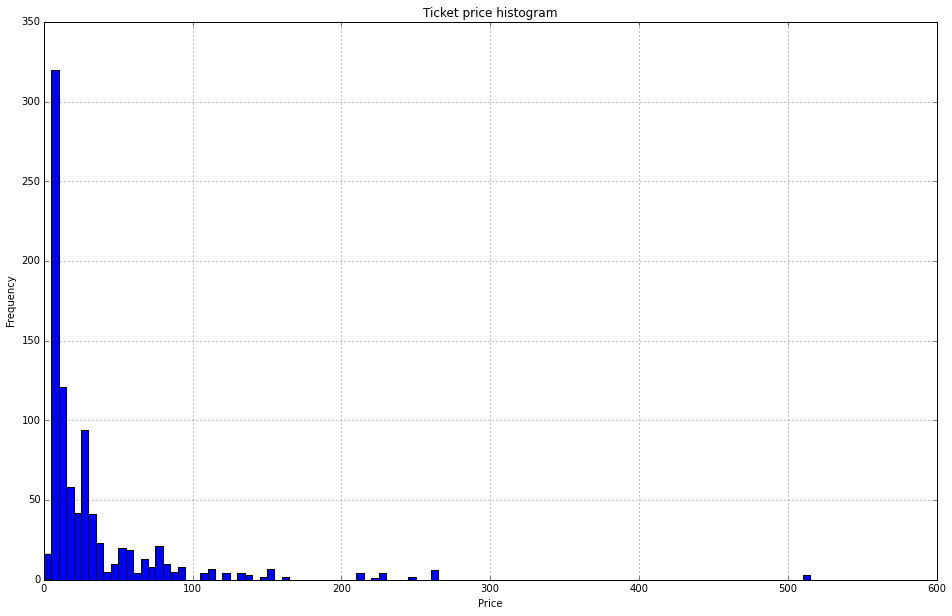

In [11]:
binwidth = 5
df.Fare.hist(bins=np.arange(min(df.Fare), max(df.Fare) + binwidth, binwidth), figsize=(16,10))
plt.title("Ticket price histogram")
plt.xlabel("Price")
plt.ylabel("Frequency")

Какие титулы имели пассажиры (примеры титула — Mrs., Mr.), едущие различными классами?

In [12]:
df.groupby(df.Pclass).title.value_counts()

Pclass              
1       mr              107
        miss             46
        mrs              42
        dr                5
        master            3
        col               2
        mlle              2
        major             2
        jonkheer          1
        mme               1
        lady              1
        capt              1
        don               1
        the countess      1
        sir               1
2       mr               91
        mrs              41
        miss             34
        master            9
        rev               6
        dr                2
        ms                1
3       mr              319
        miss            102
        mrs              42
        master           28
dtype: int64

Есть ли зависимость между классом и номером билета?

In [13]:
def ticket_to_int(ticket):
    try:
        return int(ticket.split()[-1])
    except ValueError:
        return float('NaN')
    
Pclass_Ticket_corr = df.Pclass.corr(df.Ticket.map(ticket_to_int), method='spearman')
print 'Да' if Pclass_Ticket_corr > .305 else 'Нет', ':', Pclass_Ticket_corr

Да : 0.323797582507


Какой части пассажиров удалось выжить?

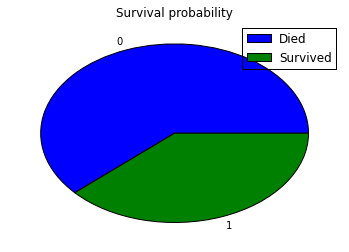

In [14]:
df.Survived.value_counts().plot(kind='pie')
plt.legend(("Died","Survived"), loc='best')
plt.title("Survival probability")

Верно ли, что женщины выживали чаще мужчин?

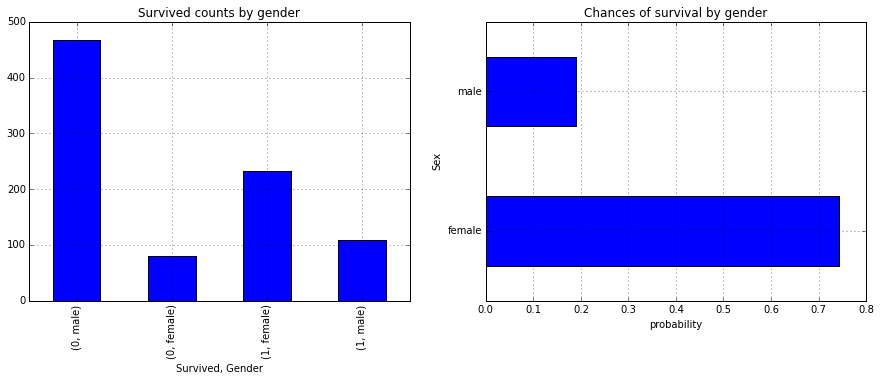

In [15]:
plt.figure(figsize=(15,5)) 
plt.subplot2grid((1,2),(0,0))
df.groupby(df.Survived).Sex.value_counts().plot(kind="bar")
plt.title("Survived counts by gender")
plt.xlabel("Survived, Gender")

plt.subplot2grid((1,2),(0,1))
(df[df.Survived==1].groupby(df.Sex).count().id/df.groupby(df.Sex).count().id).plot(kind="barh")
plt.title("Chances of survival by gender")
plt.xlabel("probability")

Верно ли, что чаще выживали пассажиры с более дорогими билетами?

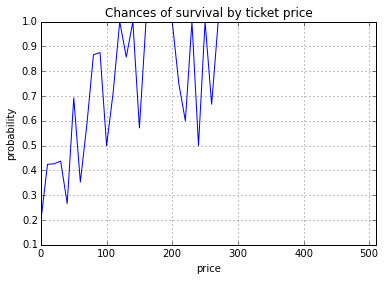

In [16]:
binwidth = 10
counts_survived, bins = np.histogram(df[df.Survived==1].Fare, bins=np.arange(min(df.Fare), max(df.Fare) + binwidth, binwidth))
counts_total, bins = np.histogram(df.Fare, bins=np.arange(min(df.Fare), max(df.Fare) + binwidth, binwidth))
(pd.Series(counts_survived, index=bins[:-1])/pd.Series(counts_total, index=bins[:-1])).replace([np.inf, -np.inf], 1).plot()
plt.title("Chances of survival by ticket price")
plt.xlabel("price")
plt.ylabel("probability")

Найдите закономерности, точно описывающие группу выживших пассажиров (все пассажиры, попадающие под правило — выжили). Что можно сказать про сложность и интерпретацию этих закономерностей? Есть ли среди логичные? Есть ли примеры ложных закономерностей?

In [17]:
df[['Pclass','Sex','Age','Fare','Embarked','had_spouse','n_children','n_parents','n_sibling']]\
.groupby([df.Survived,df.Embarked]).count()

Pclass  Sex  Age  Fare  Embarked  had_spouse  n_children  \
Survived Embarked                                                             
0        C             75   75   51    75        75          75          75   
         Q             47   47   20    47        47          47          47   
         S            427  427  353   427       427         427         427   
1        C             93   93   79    93        93          93          93   
         Q             30   30    8    30        30          30          30   
         S            217  217  201   217       217         217         217   

                   n_parents  n_sibling  
Survived Embarked                        
0        C                75         75  
         Q                47         47  
         S               427        427  
1        C                93         93  
         Q                30         30  
         S               217        217